# Łańcuchy Markowa

Łańcuchy Markowa stanowią przykład procesu stochastycznego, w którym rozważamy ciąg zmiennych losowych $X_0, X_1, X_2, \ldots$ przyjmujących wartości w określonym zbiorze stanów $S$, przy czym to w jakim stanie znajdzie się zmienna losowa $X_{i+1}$ zależy tylko i wyłącznie od tego, w jakim stanie znalazła się zmienna losowa $X_i$. Formalna definicja łańcucha Markowa brzmi następująco.

**Definicja (Łańcuch Markowa)**

**Łańcuchem Markowa** nazywamy ciąg zmiennych losowych $X_0, X_1, X_2,\dots$ taki, że dla dowolnych wartości $i_0,i_1,\dots, i_t$ zachodzi
$$\mathbb{P}(X_t=i_t|X_{t-1}=i_{t-1}, X_{t-2}=i_{t-2},\dots, X_0=i_0)=\mathbb{P}(X_t=i_t|X_{t-1}=i_{t-1}).$$

Na tym kursie interesować nas będą tylko i wyłącznie **jednorodne** łańcuchy Markowa, tzn. takie, w których zbiorem wartości każdej zmiennej losowej jest zbiór stanów $S=\{1,2,\ldots,s\}$ oraz dla każdego $t=1,2,\ldots$ zachodzi
$$\mathbb{P}(X_t=j|X_{t-1}=i)=\mathbb{P}(X_1=j|X_{0}=i).$$

Wówczas taki łańcuch możemy wyrazić za pomocą macierzy przechowującej powyższe wartości.

**Definicja (macierz przejścia)**

**Macierzą przejścia** (jednorodnego) łańcucha Markowa nazywamy macierz kwadratową $\Pi=[p_{ij}]$, której wiersze i kolumny indeksowane są stanami łańcucha oraz taką, gdzie 
$$ p_{ij}=\mathbb{P}(X_1=j|X_{0}=i)$$
oznacza prawdopodobieństwo przejścia ze stanu $i$ do stanu $j$.

**Przykład 1**

Rozważmy łańcuch Markowa $X_0, X_1, X_2, \ldots$ o dwóch stanach $0$ i $1$. Załóżmy, że w każdym kolejnym kroku prawdopodobieństwo przejścia do stanu przeciwnego jest dwa razy większe od prawdopodobieństwa pozostania w tym samym stanie. Zatem macierzą przejścia tego łańcucha jest macierz
$$\Pi= \left[
        \begin{array}{cc}
          \frac13 & \frac23 \\
          \frac23 & \frac13 \\
         \end{array}
      \right].$$
      
Jeżeli napiszemy program, który będzie wypisywał po kolei w jakim stanie znajdzie się nasz łańcuch w kolejnych krokach, to otrzymamy losowy ciąg binarny. Przyjmijmy, że nasz łańcuch Markowa startuje od bitu $0$. 

In [3]:
import random

# definiujemy funkcję, ktora z prawdop. 1/3 zwraca ten sam bit, a z prawdop. 2/3 bit przeciwny
def random_bit(i):
    if i==1:
        return 0 if random.random() < (2/3) else 1
    else:
        return 1 if random.random() < (2/3) else 0

bit = 0
print(bit, end="")
for _ in range(100):
    bit = random_bit(bit)
    print(bit, end="")

01000100010101101100100011010100101010011000101110100100101101010101011010010110010010101001010100010

**Definicja (rozkład początkowy)**

Dla łańcucha Markowa $(X_i)_{i=0}^\infty$ rozkład prawdopodobieństwa zmiennej losowej $X_0$ nazywać będziemy **rozkładem początkowym** tego łańcucha, natomiast rozkład zmiennej losowej $X_k$ nazywać będziem rozkładem po $k$ krokach. Powyższe rozkłady oznaczać będziemy odpowiednio za pomocą symboli $\bar{\rho}^0$ i $\bar{\rho}^k$.

**Twierdzenie (rozkład po $k$ krokach)**

Niech $(X_i)_{i=0}^\infty$ będzie łańcuchem Markowa o macierzy przejścia $\Pi$. Wtedy dla każdego $k, t=0,1,\dots$, zachodzi
$$ \bar{\rho}^{t+1}=\bar{\rho}^{t}\Pi=\bar{\rho}^0\Pi^{t+1},$$
a także  
$$\bar{\rho}^{t+k}=\bar{\rho}^t\Pi^{k}.$$

**Przykład 2 (Problem ruiny gracza)**

Rozważmy łańcuch Markowa o macierzy przejścia
$$ \Pi= \left[
        \begin{array}{cccc}
          1 &  0  &  0  & 0 \\
          p & 0 & 1-p & 0\\
          0 & p  &0 & 1-p \\
          0  & 0 & 0 & 1
         \end{array}
      \right]\,, $$
dla pewnego $p\in(0,1)$. Załóżmy, że $p=\frac13$ a rozkładem początkowym jest wektor $\left(0, \frac12, \frac12, 0\right)$. Zobaczmy, jak wyglądają rozkłady po $k$ krokach dla $k=1,2,\ldots, 30$. 


In [21]:
import numpy as np

# Definiujemy macierz Pi
Pi = np.array([[1, 0, 0, 0],
                [1/3, 0, 2/3, 0],
                [0, 1/3, 0, 2/3],
                [0, 0, 0, 1]])

# Definiujemy rozkład początkowy
rho_0 = np.array([0, 1/2, 1/2, 0])

rho_k = rho_0
for k in range(30):
    rho_k = rho_k.dot(Pi)
    print("Rozkład po", k+1, "krokach:", rho_k)

Rozkład po 1 krokach: [0.16666667 0.16666667 0.33333333 0.33333333]
Rozkład po 2 krokach: [0.22222222 0.11111111 0.11111111 0.55555556]
Rozkład po 3 krokach: [0.25925926 0.03703704 0.07407407 0.62962963]
Rozkład po 4 krokach: [0.27160494 0.02469136 0.02469136 0.67901235]
Rozkład po 5 krokach: [0.27983539 0.00823045 0.01646091 0.69547325]
Rozkład po 6 krokach: [0.28257888 0.00548697 0.00548697 0.70644719]
Rozkład po 7 krokach: [0.28440786 0.00182899 0.00365798 0.71010517]
Rozkład po 8 krokach: [0.28501753 0.00121933 0.00121933 0.71254382]
Rozkład po 9 krokach: [2.85423970e-01 4.06442107e-04 8.12884215e-04 7.13356704e-01]
Rozkład po 10 krokach: [2.85559451e-01 2.70961405e-04 2.70961405e-04 7.13898627e-01]
Rozkład po 11 krokach: [2.85649771e-01 9.03204683e-05 1.80640937e-04 7.14079268e-01]
Rozkład po 12 krokach: [2.85679878e-01 6.02136455e-05 6.02136455e-05 7.14199695e-01]
Rozkład po 13 krokach: [2.85699949e-01 2.00712152e-05 4.01424304e-05 7.14239837e-01]
Rozkład po 14 krokach: [2.857066

Jak widać nasz rozkład zaczyna się stabilizować, przy czym dwie środkowe wartości zbiegają do $0$, a dwie skrajne odpowiednio do $0.285714286$ i $0.714285714$ (w przybliżeniu). 

**Definicja (rozkład stacjonarny)**

Wektor $\bar\pi=(\pi_1,\dots,\pi_s)$ nazywamy **rozkładem stacjonarnym** łańcucha Markowa o macierzy przejścia $\Pi=[p_{ij}]$, jeśli spełnia poniższe warunki:
 - $\sum_{i}\pi_i=1$,
 - $\pi_i\ge 0$ dla każdego $i=1,2,\dots,s$,
 - $\bar \pi \Pi=\bar \pi$.
 
Dwa pierwsze warunki mówią nam, że wektor $\bar\pi$ jest rozkładem prawdopodobieństwa na stanach. Z kolei trzeci warunek mówi, że rozkład ten nie zmienia się po wykonaniu jednego kroku łańcucha Markowa (co można rozumieć jako swego rodzaju stan równowagi). 

Rozkład, który otrzymaliśmy w powyższym przykładzie jest właśnie rozkładem stacjonarnym. W ogólnym przypadku, aby wyznaczyć rozkład stacjonarny należy rozwiązać odpowiedni układ równań wynikający z pierwszego i trzeciego warunku definicji. Natomiast można też to zrobić numerycznie przeprowadzając podobną symulację jak powyżej. Jeśli nasz łańcuch ma dokładnie jeden rozkład stacjonarny, powinniśmy być w stanie wyznaczyć go startując od dowolnego rozkładu początkowego. Jeśli rozkładów stacjonarnych jest więcej, wówczas wybór rozkładu początkowego będzie miał znaczenie dla dalszej analizy.

## Biblioteka PyDTMC

Przydatną biblioteką do obsługi łańcuchów Markowa w Pythonie jest PyDTMC. Zanim ją zainstalujemy powinniśmy upewnić się, że mamy zainstalowane pakiety Matplotlib, NetworkX, NumPy i SciPy.  Zainstalujmy też pakiety Graphviz i pydot potrzebne do graficznego przedstawienia łańcuchów Markowa.

In [12]:
!pip install pydtmc
!pip install graphviz
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Łańcuch Markowa w PyDTMC definiujemy dzięki funkcji `MarkovChain`, która jako argumenty przyjmuje macierz przejścia oraz listę stanów.

**Przykład 3 (Problem ruiny gracza jeszcze raz)**

Zdefiniujmy ponownie łańcuch Markowa dla problemu ruiny gracza z parametrem $p=1/3$. Zobaczmy, jakie informacje na temat tego łańcucha jesteśmy w stanie uzyskać dzięki zastosowaniu biblioteki PyDTMC.


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        3
  > RECURRENT:   2
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 MONOTONE:       YES
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



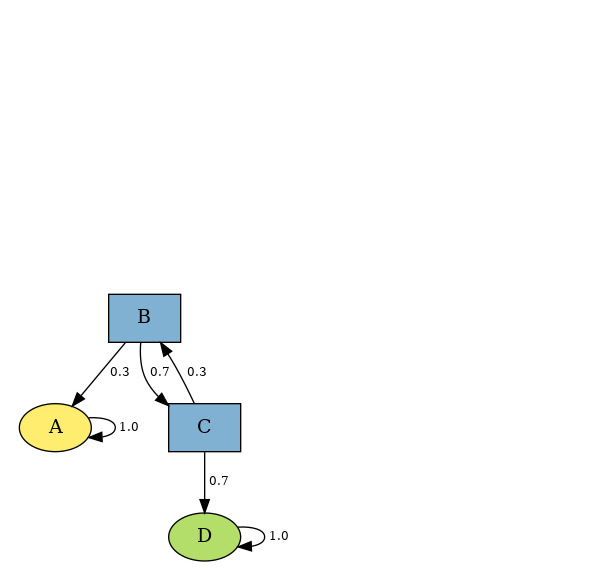

In [3]:
import pydtmc
p = [[1, 0, 0, 0], [1/3, 0, 2/3, 0], [0, 1/3, 0, 2/3], [0, 0, 0, 1]]
mc = pydtmc.MarkovChain(p, ['A', 'B', 'C', 'D'])
print(mc)
pydtmc.plot_graph(mc, dpi=300)

Niektóre z wyżej wymienionych parametrów/własności zostały zdefiniowane na wykładzie, pozostałe wyjaśnimy za chwilę. Zacznijmy od tego, że stany łańcucha możemy podzielić na **klasy**, które składają się ze wzajemnie **komunikujących się** stanów, czyli takich, dla których istnieje dodatnie prawdopodobieństwo przejścia z jednego w drugi i vice versa. Własność komunikowania się zadaje relację równoważności na zbiorze stanów, a powyżej wspomniane klasy są to po prostu klasy równoważności tej relacji.

Stany możemy podzielić na dwa typy:
 - **rekurencyjne** (*ang. recurrent*) czyli takie, dla których prawdopodobieństwo powrotu do tego stanu wynosi $1$, oraz
 - **chwilowe** (*ang. transient*), czyli takie, dla których to prawdopodobieństwo jest mniejsze od $1$.
 
Stany znajdujące się w tej samej klasie są oczywiście tego samego typu.
 
Przypomnijmy, że łańcuch Markowa nazywamy **nierozkładalnym** (*ang. irreducible*), jeśli z każdego jego stanu jesteśmy w stanie z dodatnim prawdopodobieństwem przejść do każdego innego w skończonej liczbie kroków. Przez **okres** stanu $j$ rozumiemy liczbę  $d(j) = NWD\{t \ge 1 : p^{(t)}_{jj} > 0\}$, gdzie $p^{(t)}_{jj}$ oznacza prawdopodobieństwo przejścia ze stanu $j$ z powrotem do stanu $j$ w dokładnie $t$ krokach. Stan $j$ nazywamy **okresowym**, jeśli $d(j) > 1$, w przeciwnym wypadku mówimy, że stan $j$ jest **nieokresowy**. Łańcuch Markowa jest **nieokresowy** (*ang. aperiodic*), jeśli wszystkie jego stany są nieokresowe. Ponadto, łańcuch który jest jednocześnie nierozkładalny i nieokresowy nazywamy **ergodycznym**.

**Ciekawostka:** Pojęcie ergodyczności jest bardzo ważne w matematyce i fizyce. Opisuje ono procesy, w których rozważamy pewną cząstkę poruszającą się w pewnym systemie. Ergodyczność takiego procesu mówi nam, że cząstka porusza się po tym systemie w sposób jednostajny i losowy. Co za tym idzie, możemy przewidywać własności takiego procesu na podstawie trajektorii (drogi) cząstki lub też na podstawie odpowiednio dużej liczby próbek losowych opisujących zachowanie tego systemu.    

Stanem **pochłaniającym** (*ang. absorbing*) nazywamy stan, z którego nie da się wyjść, innymi słowy jest to taki stan $j$, dla którego $p_{jj}=1$. Łańcuch Markowa jest **regularny** (*ang. regular*), jeśli jego macierz przejścia podniesiona do pewnej potęgi (całkowitej dodatniej) ma tylko dodatnie wyrazy. Łańcuch Markowa nazywamy **odwracalnym** (*ang. reversible*), jeśli łańcuch Markowa odpowiadający procesowi odwrotnemu do wyjściowego łańcucha jest tym samym łańcuchem. Natomiast **symetryczny** (*ang. symmetric*) łańcuch Markowa to taki, dla którego macierz przejścia jest symetryczna.

In [6]:
print("Stany rekurencyjne:", mc.recurrent_states)
print("Stany chwilowe:", mc.transient_states)
print("Rozkłady stacjonarne:", mc.pi)

Stany rekurencyjne: ['A', 'D']
Stany chwilowe: ['B', 'C']
Rozkłady stacjonarne: [array([1., 0., 0., 0.]), array([0., 0., 0., 1.])]


Co możemy teraz powiedzieć o łańcuchu z naszego przykładu? Jest to łańcuch, który posiada trzy klasy:
 - $\mathcal{C}_1 = \{A\}$, 
 - $\mathcal{C}_2 = \{B, C\}$, 
 - $\mathcal{C}_3 = \{D\}$.
 
Klasy $\mathcal{C}_1$ i $\mathcal{C}_3$ zawierają stany rekurencyjne. Co więcej są to też stany pochłaniające. Klasa $\mathcal{C}_2$ zawiera stany chwilowe. Na powyższej grafice każda klasa jest reprezentowana przez osobny kolor. Ponadto, stany rekurencyjne narysowane są w kształcie elipsy, a stany chwilowe w kształcie prostokąta.
Możemy też stwierdzić, że nasz łańcuch jest łańcuchem nieokresowym, ale nie jest nierozkładalny, a zatem nie może też być ergodyczny. 

Jak wiemy z wykładu każdy stan pochłaniający generuje nam rozkład stacjonarny, który jest równy $1$ na tym stanie i $0$ na pozostałych stanach. W przypadku rozważanego łańcucha Markowa dostajemy dzięki temu dwa rozkłady stacjonarne: $(1, 0, 0, 0)$ i $(0, 0, 0, 1)$. Wiemy ponadto, że każda kombinacja wypukła rozkładów stacjonarnych jest też rozkładem stacjonarnym, a zatem otrzymujemy tak naprawdę nieskończenie wiele takich rozkładów, każdy postaci $(p, 0, 0, 1-p)$ dla $p\in[0,1]$.

Biblioteka PyDTMC umożliwia nam również symulację naszego łańcucha, czyli przykładowe poruszanie się cząstki pomiędzy stanami zgodnie z rozkładem zadanym macierzą przejścia (ale w przypadku łańcuchów ze stanami pochłaniającymi taka symulacja nie zawsze jest ciekawa, bo jak tylko cząstka wpadnie do stanu pochłaniającego, nigdy go nie opuszcza).

In [18]:
print(mc.simulate(20, seed=30))

['B', 'C', 'B', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


Możemy też przedstawić taką symulację graficznie.

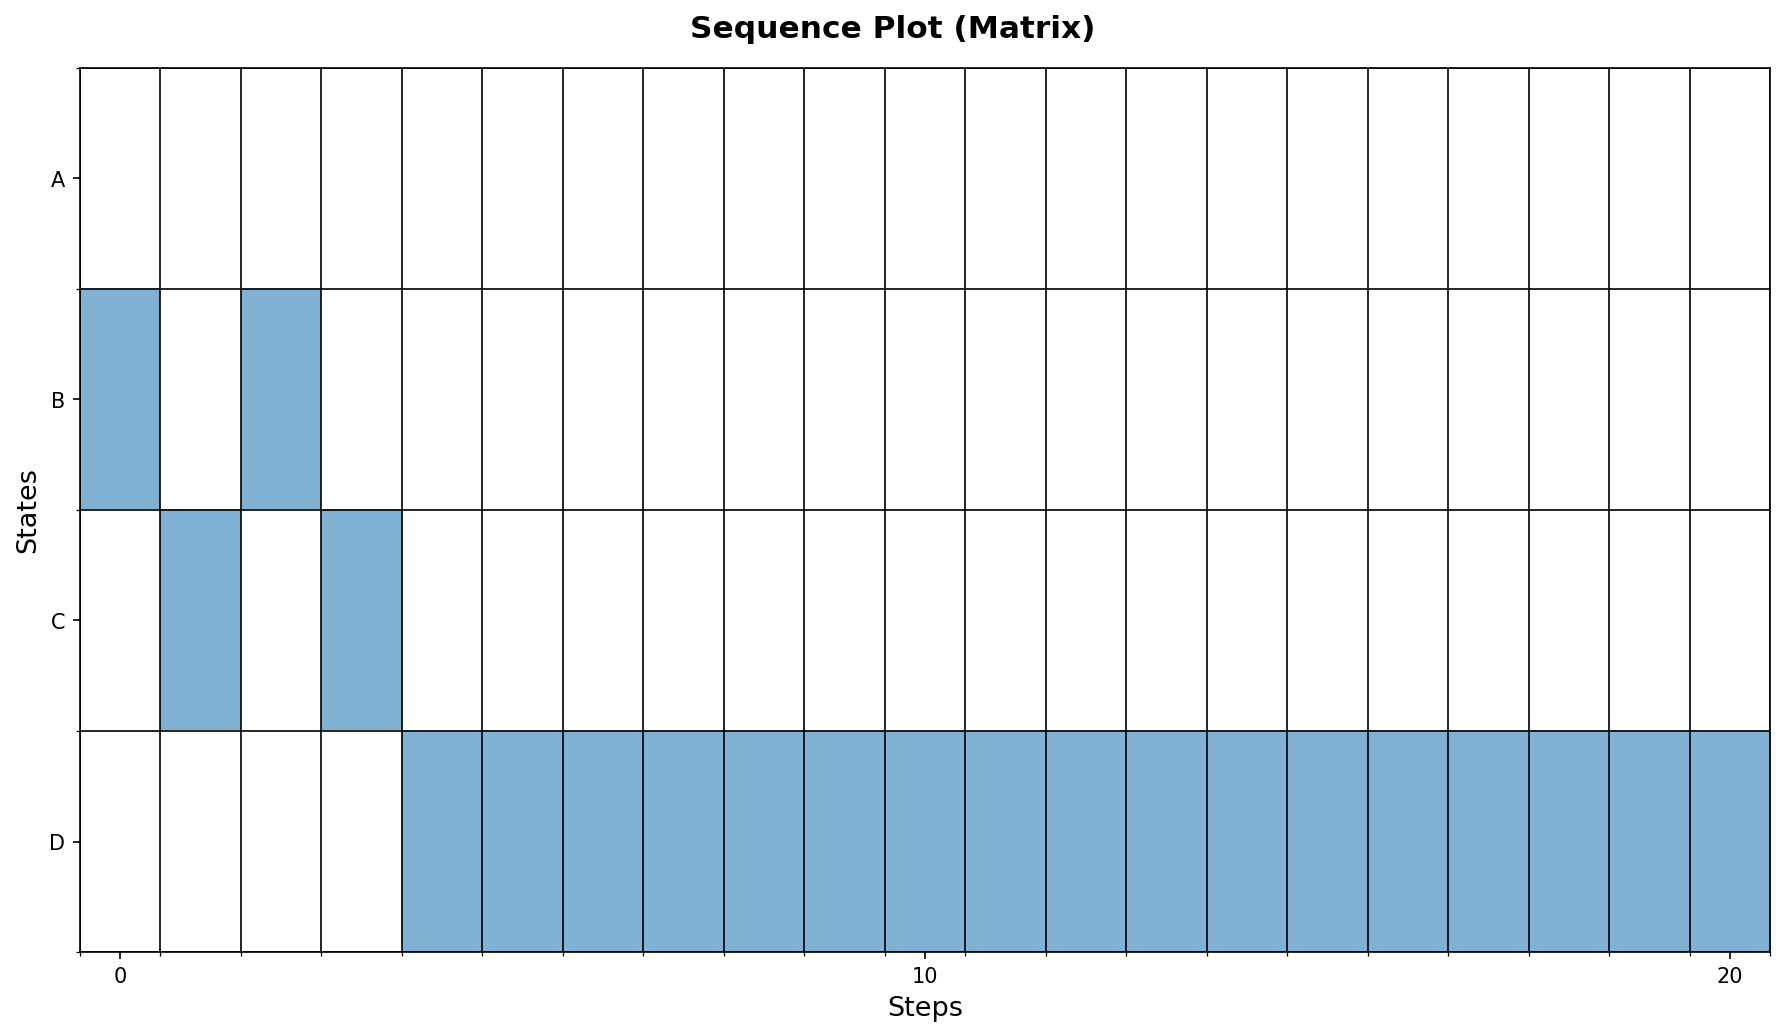

In [12]:
pydtmc.plot_sequence(mc, 20, seed=30, plot_type='matrix', dpi=75)

**Przykład 4**

Rozważmy teraz łańcuch zadany macierzą przejścia
$$ \Pi= \left[
        \begin{array}{cccc}
          1/3 &  1/3  &  1/3  & 0 \\
          1/3 & 0 & 1/3 & 1/3\\
          0 & 1/2  &0 & 1/2 \\
          1/2 & 0 & 0 & 1/2
         \end{array}
      \right]\,, $$


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 MONOTONE:       NO
 REGULAR:        YES
 REVERSIBLE:     NO
 SYMMETRIC:      NO



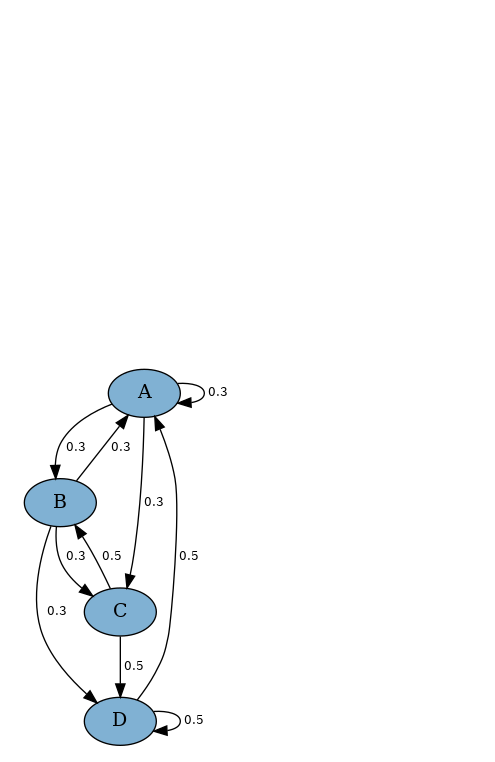

In [43]:
p2 = [[1/3, 1/3, 1/3, 0], [1/3, 0, 1/3, 1/3], [0, 1/2, 0, 1/2], [1/2, 0, 0, 1/2]]
mc2 = pydtmc.MarkovChain(p2, ['A', 'B', 'C', 'D'])
print(mc2)
pydtmc.plot_graph(mc2, dpi=300)

Tym razem jest to łańcuch ergodyczny, a zatem nieokresowy i nierozkładalny. Wszystkie jego stany należą do jednej klasy, bo z każdego stanu jesteśmy w stanie przejść do każdego innego w skończonej liczbie kroków z dodatnim prawdopodobieństwem.

## Błądzenie klasyczne na grafie

Jednym z ważniejszych przykładów łańcuchów Markowa jest **błądzenie klasyczne cząsteczki na grafie** zwane też czasem **spacerem losowym na grafie** (*ang. random walk*) . W tym eksperymencie losowym cząsteczka przemieszcza się z jednego wierzchołka grafu na drugi, za każdym razem wybierając sąsiada wierzchołka, w którym się aktualnie znajduje w sposób jednostajny, tzn. każdego z sąsiadów wybiera z równym prawdopodobieństwem. Zbiorem stanów tego łańcucha jest zbiór wierzchołków, a macierz przejścia zależna jest tylko i wyłącznie od stopni poszczególnych wierzchołków. Z wykładu wiemy, że takie własności jak nierozkładalność czy nieokresowość w przypadków błądzenia losowego na grafie zależą tylko i wyłącznie od struktury grafu, a dokładniej:
 - łańcuch jest nierozkładalny, jeśli graf po którym błądzimy jest spójny,
 - łańcuch jest nieokresowy, jeśli graf po którym błądzimy nie jest grafem dwudzielnym.
 
Co więcej, jednym z rozkładów stacjonarnych błądzenia klasycznego na $n$-wierzchołkowym grafie $G$ jest na pewno znormalizowany wektor zadany przez ciąg stopni, czyli wektor
$$\left(\frac{d(v_1)}{2e(G)}, \frac{d(v_2)}{e(G)}, \ldots, \frac{d(v_n)}{2e(G)} \right),$$
gdzie $d(v)$ oznacza stopień wierzchołka $v$, a $e(G)$ to liczba krawędzi grafu $G$. W tym wypadku normalizacja polega na podzieleniu wektora ciągu stopni przez podwojoną liczbę krawędzi tak, aby suma wyrazów w wektorze była równa $1$ (bo oczywiście z kursu Matematyki dyskretnej pamiętamy, że $\sum_{v\in V(G)} d(v) = 2e(G)$).

**Przykład 5 (błądzenie na cyklu $C_6$)**

Rozważmy błądzenie losowe na cyklu na sześciu wierzchołkach. Macierz przejścia dla tego błądzenia wygląda następująco
$$ \Pi= \left[
        \begin{array}{cccccc}
          0 &  \frac12  &  0  & 0 & 0 & \frac12 \\
          \frac12 & 0 & \frac12 & 0 & 0 & 0 \\
          0 & \frac12 & 0 & \frac12 & 0 & 0 \\
          0  & 0 & \frac12 & 0 & \frac12 & 0 \\
          0 & 0 & 0 & \frac12 & 0 & \frac12 \\
          \frac12 & 0 & 0 & 0 & \frac12 & 0
         \end{array}
      \right]\,. $$
      
Przyjmijmy, że błądzenie losowe rozpoczynamy w wierzchołku nr $1$, co możemy zasymulować przyjmując jako rozkład początkowy rozkład $\bar{\rho}^0 = (1, 0, 0, 0, 0, 0, 0)$.



DISCRETE-TIME MARKOV CHAIN
 SIZE:           6
 RANK:           6
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        NO
  > APERIODIC:   NO (2)
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 MONOTONE:       NO
 REGULAR:        NO
 REVERSIBLE:     YES
 SYMMETRIC:      YES



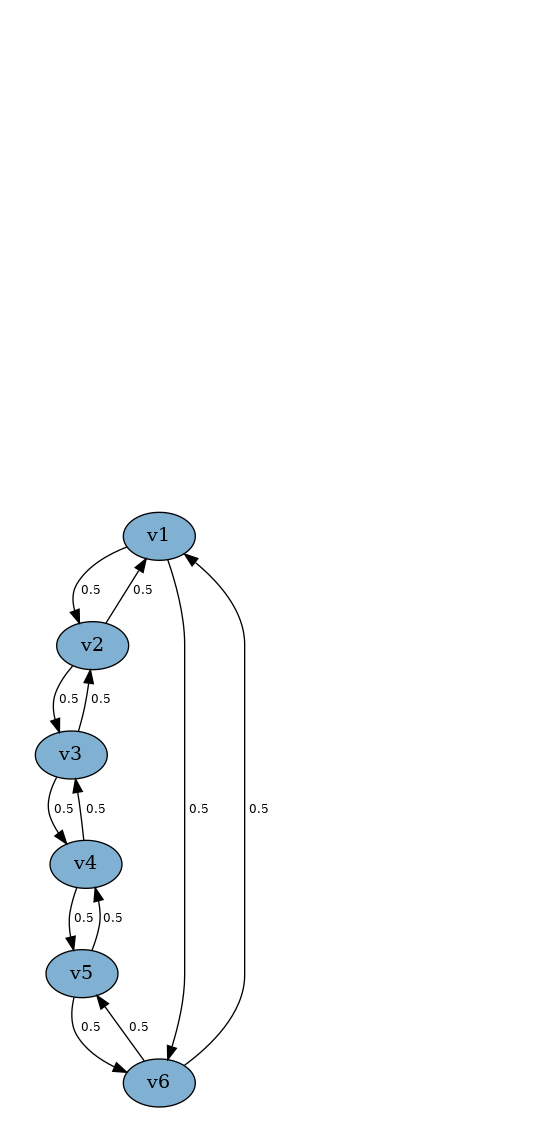

In [27]:
p3 = [[0, 0.5, 0, 0, 0, 0.5], [0.5, 0, 0.5, 0, 0, 0], [0, 0.5, 0, 0.5, 0, 0], [0, 0, 0.5, 0, 0.5, 0], [0, 0, 0, 0.5, 0, 0.5], [0.5, 0, 0, 0, 0.5, 0]]
c6_rw = pydtmc.MarkovChain(p3, ['v1', 'v2', 'v3', 'v4', 'v5', 'v6'])
print(c6_rw)
pydtmc.plot_graph(c6_rw, dpi=300)

Co możemy powiedzieć o tym łańcuchu Markowa? Jest on na pewno łańcuchem okresowym, a okres tego łańcucha wynosi $2$.

In [32]:
print("Okres łańcucha:", c6_rw.period)

Okres łańcucha: 2


Spróbujemy teraz wyznaczyć jego rozkład stacjonarny poprzez wyznaczenie rozkładu po $k$ krokach startując od rozkładu początkowego $\bar{\rho}^0 = (1, 0, 0, 0, 0, 0, 0)$.

In [37]:
rho_0 = np.array([1, 0, 0, 0, 0, 0])

rho_k = rho_0
for k in range(30):
    rho_k = rho_k.dot(p3)
    print("Rozkład po", k+1, "krokach:", rho_k)

Rozkład po 1 krokach: [0.  0.5 0.  0.  0.  0.5]
Rozkład po 2 krokach: [0.5  0.   0.25 0.   0.25 0.  ]
Rozkład po 3 krokach: [0.    0.375 0.    0.25  0.    0.375]
Rozkład po 4 krokach: [0.375  0.     0.3125 0.     0.3125 0.    ]
Rozkład po 5 krokach: [0.      0.34375 0.      0.3125  0.      0.34375]
Rozkład po 6 krokach: [0.34375  0.       0.328125 0.       0.328125 0.      ]
Rozkład po 7 krokach: [0.        0.3359375 0.        0.328125  0.        0.3359375]
Rozkład po 8 krokach: [0.3359375  0.         0.33203125 0.         0.33203125 0.        ]
Rozkład po 9 krokach: [0.         0.33398438 0.         0.33203125 0.         0.33398438]
Rozkład po 10 krokach: [0.33398438 0.         0.33300781 0.         0.33300781 0.        ]
Rozkład po 11 krokach: [0.         0.33349609 0.         0.33300781 0.         0.33349609]
Rozkład po 12 krokach: [0.33349609 0.         0.33325195 0.         0.33325195 0.        ]
Rozkład po 13 krokach: [0.         0.33337402 0.         0.33325195 0.         0.3333

Jak widać w tym przypadku rozkład po $k$ krokach nie stabilizuje się, natomiast możemy zaobserwować cykliczne zachowanie, gdzie na przemian rozkład jest skupiony na wierzchołkach $v_1, v_3, v_5$ i $v_2, v_4, v_6$. Wynika to z okresowości naszego łańcucha. Co się stanie jeśli wystartujemy z innego rozkładu stacjonarnego?

In [38]:
rho_0 = np.array([1/2, 1/2, 0, 0, 0, 0])

rho_k = rho_0
for k in range(30):
    rho_k = rho_k.dot(p3)
    print("Rozkład po", k+1, "krokach:", rho_k)

Rozkład po 1 krokach: [0.25 0.25 0.25 0.   0.   0.25]
Rozkład po 2 krokach: [0.25  0.25  0.125 0.125 0.125 0.125]
Rozkład po 3 krokach: [0.1875 0.1875 0.1875 0.125  0.125  0.1875]
Rozkład po 4 krokach: [0.1875  0.1875  0.15625 0.15625 0.15625 0.15625]
Rozkład po 5 krokach: [0.171875 0.171875 0.171875 0.15625  0.15625  0.171875]
Rozkład po 6 krokach: [0.171875  0.171875  0.1640625 0.1640625 0.1640625 0.1640625]
Rozkład po 7 krokach: [0.16796875 0.16796875 0.16796875 0.1640625  0.1640625  0.16796875]
Rozkład po 8 krokach: [0.16796875 0.16796875 0.16601562 0.16601562 0.16601562 0.16601562]
Rozkład po 9 krokach: [0.16699219 0.16699219 0.16699219 0.16601562 0.16601562 0.16699219]
Rozkład po 10 krokach: [0.16699219 0.16699219 0.16650391 0.16650391 0.16650391 0.16650391]
Rozkład po 11 krokach: [0.16674805 0.16674805 0.16674805 0.16650391 0.16650391 0.16674805]
Rozkład po 12 krokach: [0.16674805 0.16674805 0.16662598 0.16662598 0.16662598 0.16662598]
Rozkład po 13 krokach: [0.16668701 0.166687

Tym razem dość szybko dochodzimy do rozkładu stacjonarnego $\left(\frac16, \frac16, \frac16, \frac16, \frac16, \frac16\right)$, który jest dokładnie rozkładem otrzymanym z ciągu stopni. Zobaczmy jeszcze jakie rozkłady stacjonarne wyznaczy nam polecenie z PyDTMC.

In [41]:
print("Rozkłady stacjonarne dla błądzenia klasycznego na cyklu C6:", c6_rw.pi)

Rozkłady stacjonarne dla błądzenia klasycznego na cyklu C6: [array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])]


## Bibliografia

Dokumentację dotyczącą omawianego pakietu można znaleźć na stronie [PyDTMC](https://pydtmc.readthedocs.io/).